# Game Data Analytics

In [1]:
import pandas as pd
import os

%matplotlib inline

dir_pth = '../../dataset'
file_pth = os.path.join(dir_pth, 'top_games_1605584163.csv')

df = pd.read_csv(file_pth)
print(df.shape)
df.head()

(400, 12)


,id,name,box_art_url,Live viewers,Live channels,Rank,"Avg. viewers, 7 days","Avg. channels, 7 days","Hours watched, 7 days",Peak viewers,Peak channels,"Viewers per channel, 7 days"
0,509658,Just Chatting,https://static-cdn.jtvnw.net/ttv-boxart/Just%2...,299224,4433,# 1,299688,3927,50497355,951446 2020-06-11,12139 2020-06-11,76.3
1,512709,Call of Duty: Black Ops Cold War,https://static-cdn.jtvnw.net/ttv-boxart/./Call...,204850,11543,# 3,127076,5188,21391077,705050 2020-09-09,23950 2020-11-13,24.5
2,27471,Minecraft,https://static-cdn.jtvnw.net/ttv-boxart/Minecr...,140003,3560,# 4,119295,3013,20101218,620179 2020-11-16,5545 2020-11-07,39.6
3,21779,League of Legends,https://static-cdn.jtvnw.net/ttv-boxart/League...,132413,4971,# 2,174246,4764,29360440,2044782 2020-10-31,8887 2020-11-14,36.6
4,33214,Fortnite,https://static-cdn.jtvnw.net/ttv-boxart/Fortni...,91322,7308,# 5,106584,8335,17959451,2277171 2020-06-15,117582 2020-06-15,12.8


In [2]:
df.dtypes

id                               int64
name                            object
box_art_url                     object
Live viewers                     int64
Live channels                    int64
Rank                            object
Avg. viewers, 7 days             int64
Avg. channels, 7 days            int64
Hours watched, 7 days            int64
Peak viewers                    object
Peak channels                   object
Viewers per channel, 7 days    float64
dtype: object

## Delete useless data

In [3]:
df = df.drop('box_art_url', axis=1)
print(df.shape)

(400, 11)


In [4]:
df.isnull().sum()

id                             0
name                           0
Live viewers                   0
Live channels                  0
Rank                           0
Avg. viewers, 7 days           0
Avg. channels, 7 days          0
Hours watched, 7 days          0
Peak viewers                   0
Peak channels                  0
Viewers per channel, 7 days    0
dtype: int64

## Add labels for each game

Define a function to get labels from tag files

In [5]:
import glob

tag_pth = os.path.join(dir_pth, 'tags')
all_tag_files = glob.glob(tag_pth + '/*.csv')

def get_tags():
    tags = {}
    for tag_file in all_tag_files:
        try:
            df = pd.read_csv(tag_file)
        except:
            continue
        ids = df['id'].values
        tag = tag_file.split('/')[-1].split('.')[0]
        tags[tag] = ids
    return tags

tags = get_tags()

def find_label(game_id):
    labels = []
    
    for key, val in tags.items():
        if game_id in val:
            labels.append(key)
    return labels
            

print(find_label(509658))

['IRL']


In [6]:
ids = df['id'].values
labels = [find_label(id) for id in ids]
df['label'] = labels

df.head()

,id,name,Live viewers,Live channels,Rank,"Avg. viewers, 7 days","Avg. channels, 7 days","Hours watched, 7 days",Peak viewers,Peak channels,"Viewers per channel, 7 days",label
0,509658,Just Chatting,299224,4433,# 1,299688,3927,50497355,951446 2020-06-11,12139 2020-06-11,76.3,[IRL]
1,512709,Call of Duty: Black Ops Cold War,204850,11543,# 3,127076,5188,21391077,705050 2020-09-09,23950 2020-11-13,24.5,[FPS]
2,27471,Minecraft,140003,3560,# 4,119295,3013,20101218,620179 2020-11-16,5545 2020-11-07,39.6,"[MMO, AdventureGame, Survival]"
3,21779,League of Legends,132413,4971,# 2,174246,4764,29360440,2044782 2020-10-31,8887 2020-11-14,36.6,[MOBA]
4,33214,Fortnite,91322,7308,# 5,106584,8335,17959451,2277171 2020-06-15,117582 2020-06-15,12.8,"[Survival, Shooter, OpenWorld]"


## Remove item with `IRL` label

In [7]:
idxes = []
for idx, row in df.iterrows():
    label = row['label']
    if 'IRL' in label:
        idxes.append(idx)
df = df.drop(idxes)

print(df.shape)
df.head()

(388, 12)


,id,name,Live viewers,Live channels,Rank,"Avg. viewers, 7 days","Avg. channels, 7 days","Hours watched, 7 days",Peak viewers,Peak channels,"Viewers per channel, 7 days",label
1,512709,Call of Duty: Black Ops Cold War,204850,11543,# 3,127076,5188,21391077,705050 2020-09-09,23950 2020-11-13,24.5,[FPS]
2,27471,Minecraft,140003,3560,# 4,119295,3013,20101218,620179 2020-11-16,5545 2020-11-07,39.6,"[MMO, AdventureGame, Survival]"
3,21779,League of Legends,132413,4971,# 2,174246,4764,29360440,2044782 2020-10-31,8887 2020-11-14,36.6,[MOBA]
4,33214,Fortnite,91322,7308,# 5,106584,8335,17959451,2277171 2020-06-15,117582 2020-06-15,12.8,"[Survival, Shooter, OpenWorld]"
5,510218,Among Us,85840,2492,# 6,101789,1887,17151377,774280 2020-11-05,12362 2020-09-26,53.9,"[Survival, Strategy]"


## Check if there is an item with empty label

In [8]:
idxes = []

for idx, row in df.iterrows():
    label = row['label']
    if not label:
        print(row['name'])
        idxes.append(idx)

df = df.drop(idxes)

print(df.shape)

Mega Man 3
Halo: The Master Chief Collection
Quest for Glory: Shadows of Darkness
Games + Demos
Out of the Park Baseball 21
Pokémon FireRed/LeafGreen
Skies of Arcadia
Pokémon HeartGold/SoulSilver
Mega Man Online
Warhammer
Phantom Brigade
Pokémon Omega Ruby/Alpha Sapphire
RAW
Always On
Mega Man 4
Half-Life 2: Episode Two
Frostborn
Twitch Plays
(370, 12)


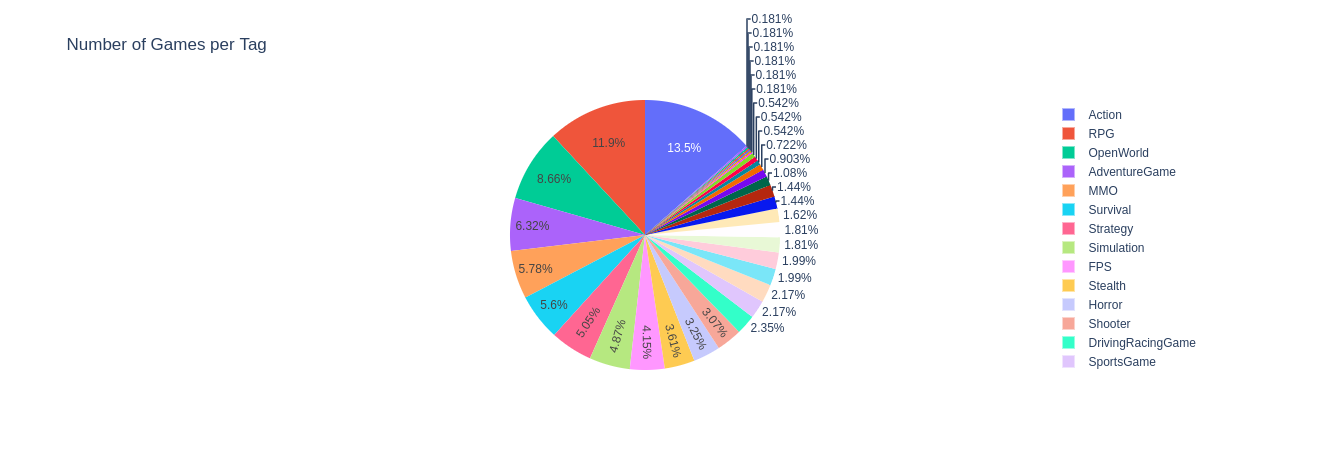

In [22]:
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

cat = {}
for _, row in df.iterrows():
    label = row['label']
    for tag in label:
        if tag in cat:
            cat[tag].append(row['id'])
        else:
            cat[tag] = [row['id']]

def draw_number_of_each_tag():
    data = {'tag': [], 'num': []}
    for key in cat.keys():
        data['tag'].append(key)
        data['num'].append(len(cat[key]))
    trace = go.Pie(
        labels=data['tag'],
        values=data['num'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Number of Games per Tag',
        yaxis_title='Number of Games',
    )
    pyo.iplot(fig, filename='stacked-bar')

draw_number_of_each_tag()

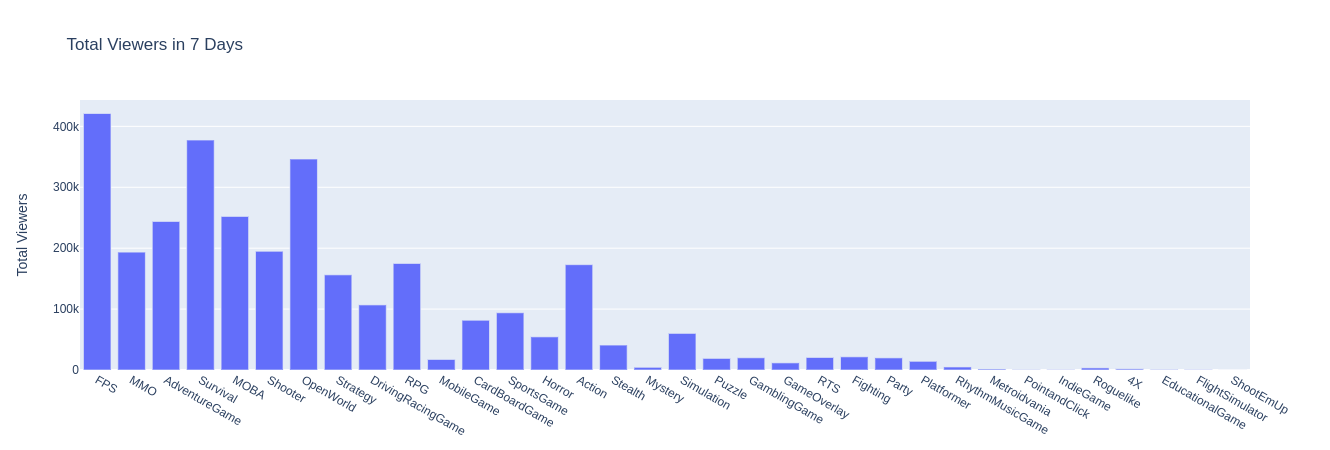

In [21]:
def draw_total_viewers():
    data = {'tag': [], 'total': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        total = sdf['Avg. viewers, 7 days'].sum()
        data['total'].append(total)
    trace = go.Bar(
        x=data['tag'],
        y=data['total'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Total Viewers in 7 Days',
        yaxis_title='Total Viewers',
    )
    pyo.iplot(fig, filename='stacked-bar')

draw_total_viewers()

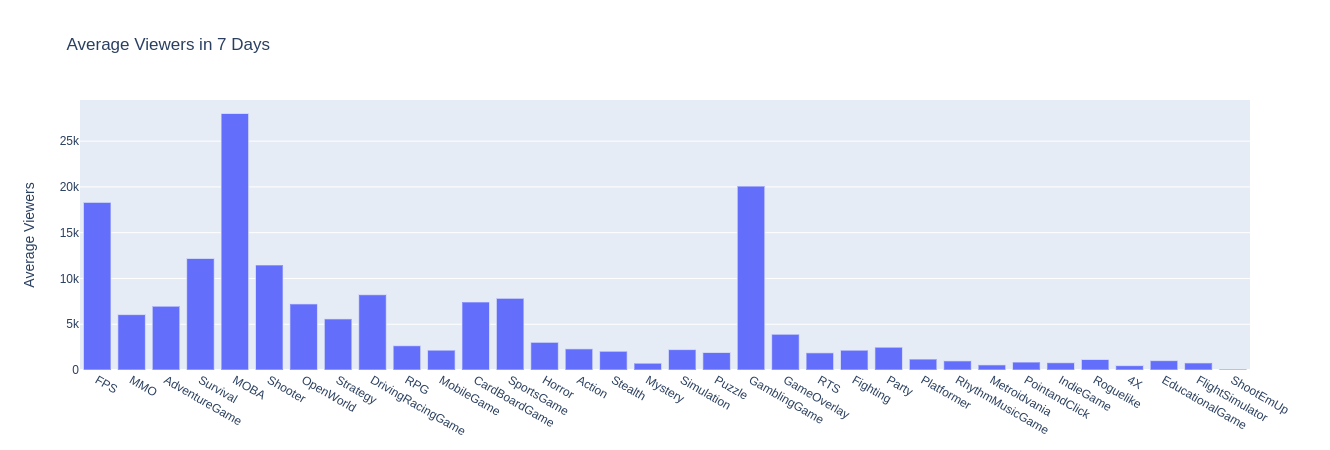

In [53]:
def draw_average_viewers():
    data = {'tag': [], 'aver': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        aver = sdf['Avg. viewers, 7 days'].sum() *1.0 / len(cat[key])
        data['aver'].append(aver)
    trace = go.Bar(
        x=data['tag'],
        y=data['aver'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Average Viewers in 7 Days',
        yaxis_title='Average Viewers',
    )
    pyo.iplot(fig)

draw_average_viewers()

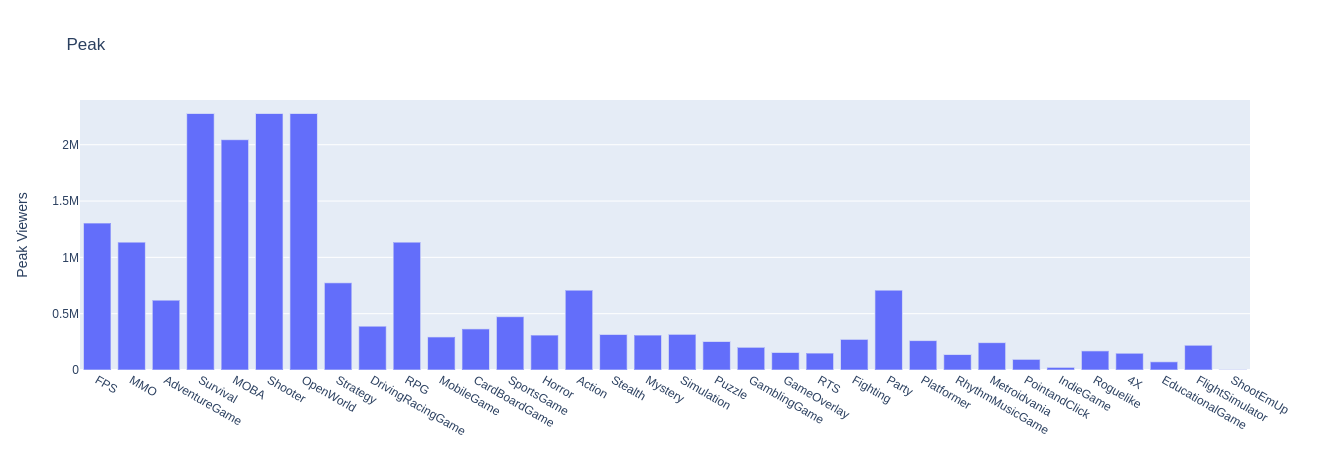

In [55]:
def draw_peak_viewers():
    data = {'tag': [], 'peak': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        peak = sdf['Peak viewers '].str.split(' ').str[0].astype(int)
        data['peak'].append(peak.max())
    trace = go.Bar(
        x=data['tag'],
        y=data['peak'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Peak',
        yaxis_title='Peak Viewers',
    )
    pyo.iplot(fig)

draw_peak_viewers()

Index(['id', 'name', 'Live viewers', 'Live channels', 'Rank',
       'Avg. viewers, 7 days', 'Avg. channels, 7 days',
       'Hours watched, 7 days', 'Peak viewers ', 'Peak channels ',
       'Viewers per channel, 7 days', 'label'],
      dtype='object')


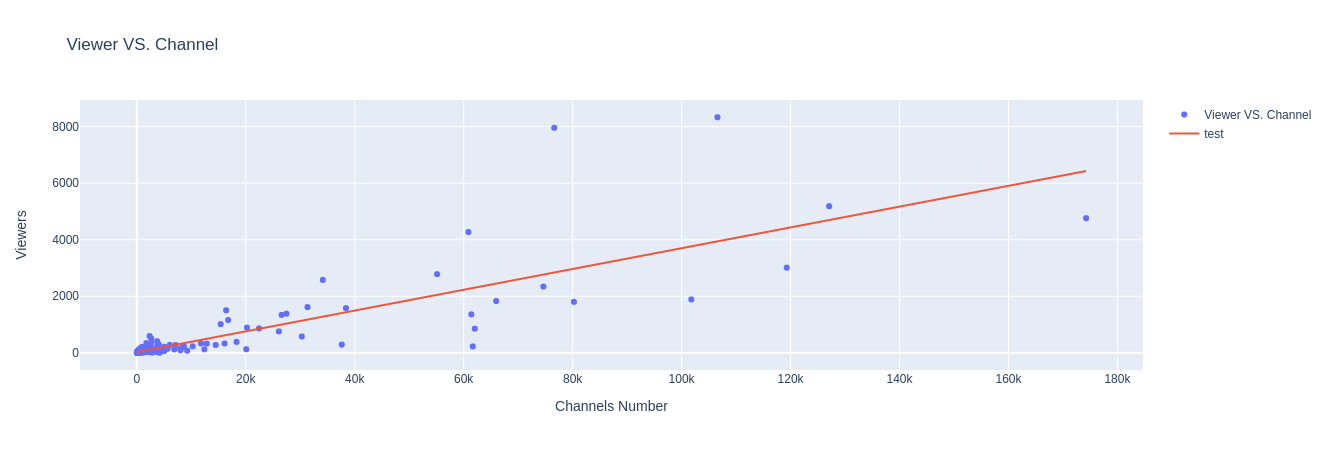

In [83]:
from sklearn.linear_model import LinearRegression
import numpy as np

print(df.columns)

def draw_viewer_channel():
    data = {'channel': [], 'viewer': []}
    
    for _, row in df.iterrows():
        data['channel'].append(row['Avg. viewers, 7 days'])
        data['viewer'].append(row['Avg. channels, 7 days'])
    model = LinearRegression()
    model.fit(np.array(data['channel']).reshape(-1, 1), np.array(data['viewer']))
    trace1 = go.Scatter(
        x=data['channel'],
        y=data['viewer'],
        name='Viewer VS. Channel',
        mode = 'markers'
    )
    x_range = np.linspace(min(data['channel']), max(data['channel']), 100)
    y_range = model.predict(x_range.reshape(-1, 1))
    trace2 = go.Scatter(
        x=x_range,
        y=y_range,
        name='Line',
    )
    fig=go.Figure(data=[trace1, trace2])
    fig.update_layout(
        title='Viewer VS. Channel',
        xaxis_title='Channels Number',
        yaxis_title='Viewers',
    )
    pyo.iplot(fig)

draw_viewer_channel()